# COE782- ML - Lista2 - Parte prática - E5

## Modelo K-NN

Vivian de Carvalho Rodrigues

DRE:125228569

In [1]:
#Referencias 
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
#https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors

In [2]:
#1) Dados de treinamento
# vetores aleatórios com distribuição normal multivariada

#quantidade de registros
n_train = 10
n_test = 4


# Média e covariância - Classe 1

mu1 = np.array([-1,-1])
cov1 = np.array([[1,0],[0,1]])
C1 = np.random.multivariate_normal(mu1, cov1, n_train)

# Média e covariância - Classe 2
mu2 = np.array([1,1])
cov2 = np.array([[1,0],[0,1]])
C2 = np.random.multivariate_normal(mu2, cov2, n_train)

#treino - X
treino = np.concatenate((C1,C2),axis = 0)                                      #matriz de treino [x1 , x2]

#targets - y
#targets Class1 = '0' , Class2 = '1'
class1 = np.zeros(n_train).reshape(n_train,1)
class2 = np.ones(n_train).reshape(n_train,1)

target = np.concatenate((class1, class2), axis=0).reshape(2*n_train,)           #vetot linha
print(treino, target)

[[-1.57136005 -0.59636261]
 [-0.8167397  -0.69424299]
 [ 0.52579439 -1.70540887]
 [-1.45026325 -0.78617975]
 [-1.51018921 -0.55757163]
 [ 0.48353987 -0.74867394]
 [-0.2063701  -0.07028625]
 [-1.45340814 -1.04479899]
 [-1.35129761 -1.64097838]
 [-0.32456723 -1.19499531]
 [-0.65971806  2.07457242]
 [ 2.72843345  0.6340389 ]
 [ 0.36473443  0.11778589]
 [ 0.86214656  0.96234828]
 [ 0.2748478   0.51679064]
 [ 0.96717178  0.75227789]
 [ 2.23797801  0.18980333]
 [ 1.22370571  1.81645314]
 [ 1.49772259  0.51957375]
 [ 0.51917415  1.51422252]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


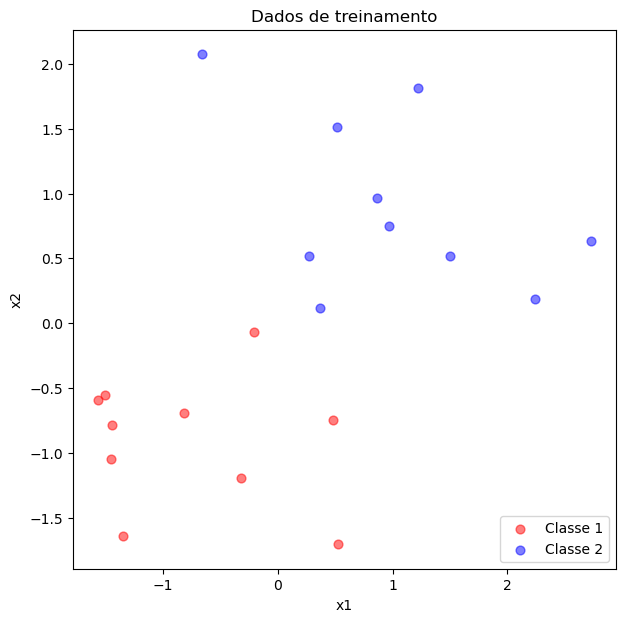

In [3]:
# plot dos dados de treinamento
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(C1[:,0], C1[:,1], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(C2[:,0], C2[:,1], marker='o', color='blue', s=40, alpha=0.5)
plt.legend(['Classe 1', 'Classe 2'], loc='lower right') 
plt.title('Dados de treinamento')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()

In [4]:
#2) Dados de teste

#parametros auxiliares
e = np.random.randint(10,size =(1))
n = int((-1)**e) 

#gera dados de teste
mu_t = np.random.random_sample(size=(2)) + n                  #média de teste gerado aleatóriamente                               


cov_t = np.random.random_sample(size=(2, 2))                  #covariância de teste gerada aleatóriamente
cov_t [0,1] = cov_t[1,0]*n
cov_t[1,0] = cov_t[1,0]*n

teste = np.random.multivariate_normal(mu_t, cov_t, n_test)
teste

array([[-0.17278298,  0.25987315],
       [ 0.5762289 , -0.42518949],
       [ 0.7501002 ,  0.72165651],
       [ 0.21429835,  0.71956196]])

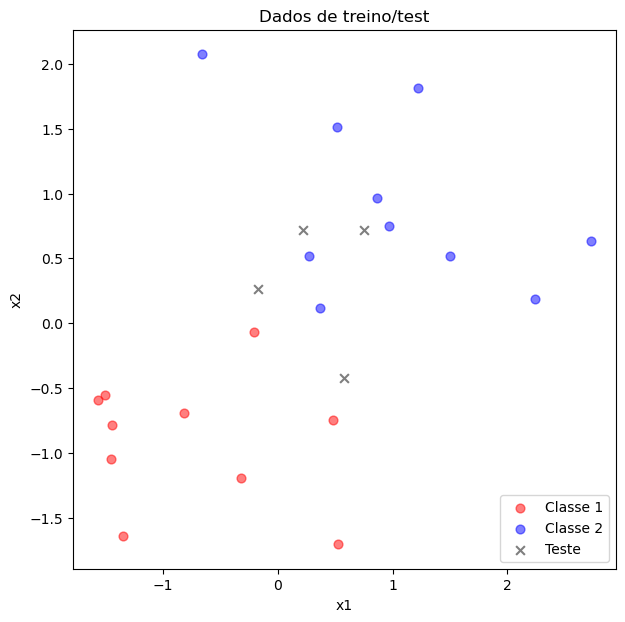

In [5]:
# plot dos dados de treino e teste
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(C1[:,0], C1[:,1], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(C2[:,0], C2[:,1], marker='o', color='blue', s=40, alpha=0.5)
ax.scatter(teste[:,0], teste[:,1], marker='x', color='black', s=40, alpha=0.5)
plt.legend(['Classe 1', 'Classe 2','Teste'], loc='lower right') 
plt.title('Dados de treino/test')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()

In [6]:
#3)Treinamento K=NN
n_neighbors = 2

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(treino, target)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [7]:
#predição do conjunto de teste
pred = clf.predict(teste)
pred

array([0., 0., 1., 1.])

In [8]:
#separando o conjunto de teste de acordo com a classe predita
pred1 = []
pred2 = []

for i in range(4):
    if pred[i] == 0:
        pred1 += [list(teste[i])]
    else:
        pred2 += [list(teste[i])]

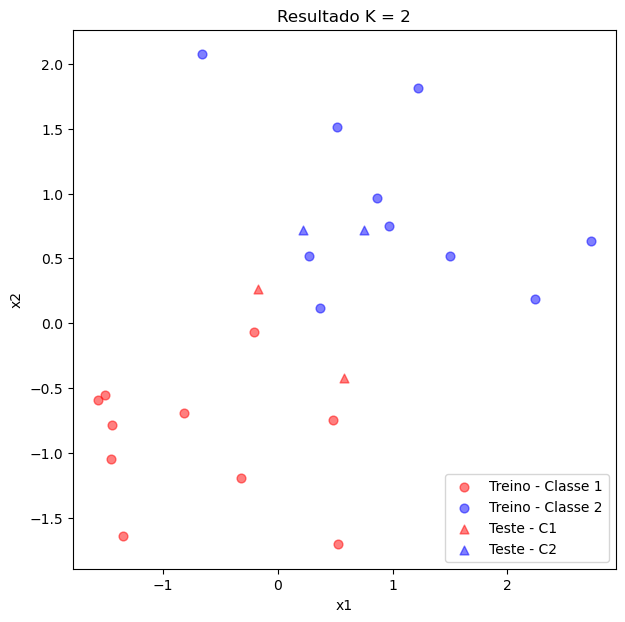

In [10]:
# plot dos dados de treino e teste
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(C1[:,0], C1[:,1], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(C2[:,0], C2[:,1], marker='o', color='blue', s=40, alpha=0.5)
ax.scatter(np.array(pred1)[:,0], np.array(pred1)[:,1], marker='^', color='red', s=40, alpha=0.5)
ax.scatter(np.array(pred2)[:,0], np.array(pred2)[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Treino - Classe 1', 'Treino - Classe 2','Teste - C1', 'Teste - C2'], loc='lower right') 
plt.title('Resultado K = 2')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()

In [11]:
#Variando k
n_neighbors = [1, 3, 5]
pred = []

#p/ separar a classificação predita 
pred1 = []
pred2 = []

for k in range(len(n_neighbors)):
    clf = neighbors.KNeighborsClassifier(n_neighbors[k], weights='distance')
    clf.fit(treino, target)
    pred += [list(clf.predict(teste))]
    
    for i in range(n_test):
        if pred[k][i] == 0:
            pred1 += [list(teste[i])]
        else:
            pred2 += [list(teste[i])]
print(pred)

[[0.0, 0.0, 1.0, 1.0], [1.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]]


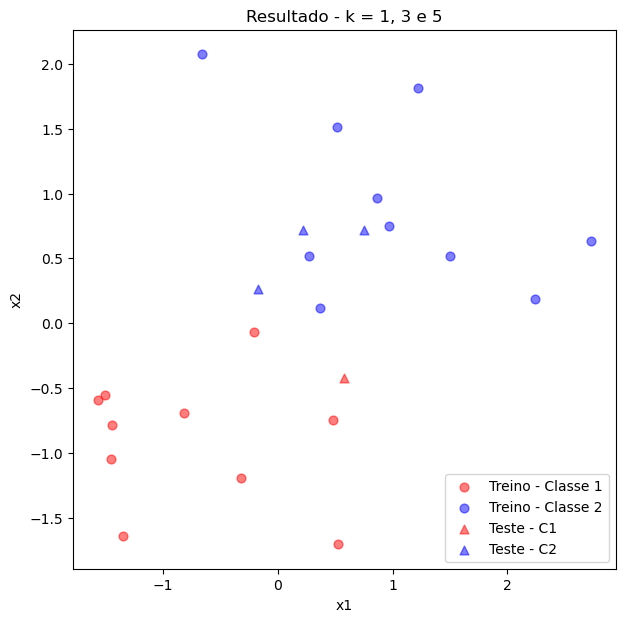

In [19]:
# plot dos dados de treino e teste
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(C1[:,0], C1[:,1], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(C2[:,0], C2[:,1], marker='o', color='blue', s=40, alpha=0.5)
ax.scatter(np.array(pred1)[:,0], np.array(pred1)[:,1], marker='^', color='red', s=40, alpha=0.5)
ax.scatter(np.array(pred2)[:,0], np.array(pred2)[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Treino - Classe 1', 'Treino - Classe 2','Teste - C1', 'Teste - C2'], loc='lower right') 
plt.title('Resultado - k = 1, 3 e 5')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()

In [17]:
#k = 3
n_neighbors = 3

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(treino, target)

#predição do conjunto de teste
pred = clf.predict(teste)

#separando o conjunto de teste de acordo com a classe predita
pred1 = []
pred2 = []

for i in range(4):
    if pred[i] == 0:
        pred1 += [list(teste[i])]
    else:
        pred2 += [list(teste[i])]

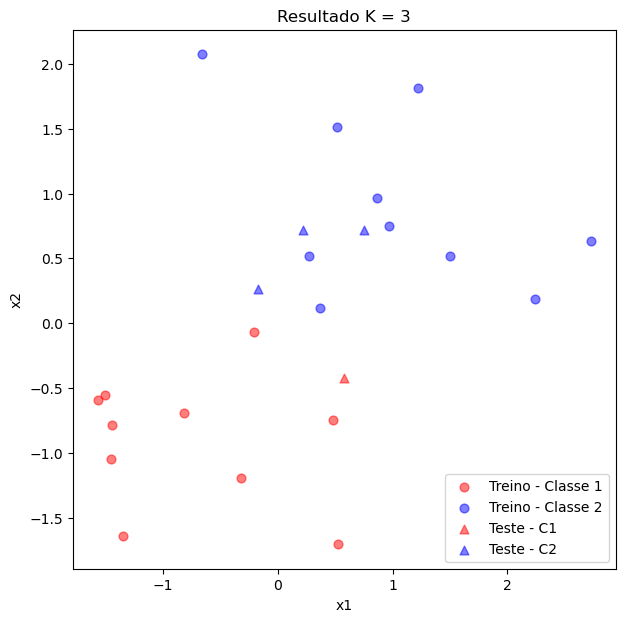

In [18]:
# plot dos dados de treino e teste
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(C1[:,0], C1[:,1], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(C2[:,0], C2[:,1], marker='o', color='blue', s=40, alpha=0.5)
ax.scatter(np.array(pred1)[:,0], np.array(pred1)[:,1], marker='^', color='red', s=40, alpha=0.5)
ax.scatter(np.array(pred2)[:,0], np.array(pred2)[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Treino - Classe 1', 'Treino - Classe 2','Teste - C1', 'Teste - C2'], loc='lower right') 
plt.title('Resultado K = 3')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()